In [1]:
# Data 205 - Capstone in Data Science
# Jennifer Paraboschi     Fall 2020
# Inputs: data sets from dataMontgomery
# including Alcohol Beverage Licensing Violations

In [2]:
# Import packages. 
# Pull in API data set as json.
import json
import numpy as np
import pandas as pd
import re
import requests
import seaborn as sns
import matplotlib.pyplot as plt
import plotly    # I had to pip install plotly on the cmd line to get plotly to work

In [3]:
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,2020-11-21T00:00:00.000
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,NaN
2,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,6.9 STORAGE,$1600 +ALERT,NaN
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,5.5 RECORDS,$500 +ALERT,NaN
4,GISELE'S CREOLE CUISINE,"2407 PRICE AVENUE , SILVER SPRING , MARYLAND -...",2020-09-18T00:00:00.000,6.9 STORAGE,$400 +ALERT,2020-11-21T00:00:00.000


In [4]:
print(violations_data)

                facilityname  \
0            EL CARACOL CAFE   
1       MOGOTILLO RESTAURANT   
2       MOGOTILLO RESTAURANT   
3       MOGOTILLO RESTAURANT   
4    GISELE'S CREOLE CUISINE   
..                       ...   
937             JOSE'S GRILL   
938             JOSE'S GRILL   
939       SEVEN-ELEVEN STORE   
940       SEVEN-ELEVEN STORE   
941       SEVEN-ELEVEN STORE   

                                               address  \
0     609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910   
1    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
2    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
3    7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...   
4    2407 PRICE AVENUE , SILVER SPRING , MARYLAND -...   
..                                                 ...   
937             11423 GEORGIA AVE. , WHEATON, MD 20902   
938             11423 GEORGIA AVE. , WHEATON, MD 20902   
939  14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...   
940       14101 GEORGIA AVE. , ASPE

In [5]:
violations_data.shape

(942, 6)

In [6]:
type(violations_data)

pandas.core.frame.DataFrame

In [7]:
# There are 942 rows and 6 variables/columns.

In [8]:
violations_data.dtypes

facilityname       object
address            object
violationdate      object
violation          object
disposition        object
dispositiondate    object
dtype: object

In [9]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate
count,942,942,942,942,940,936
unique,546,582,339,38,146,406
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17T00:00:00.000,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11T00:00:00.000
freq,11,11,16,381,96,18


In [10]:
# There are a few missing values for disposition and disposition date (counts are fewer than total count in some columns).
# The most frequent violation is for sale to minor.

In [11]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     942 non-null    object
 1   address          942 non-null    object
 2   violationdate    942 non-null    object
 3   violation        942 non-null    object
 4   disposition      940 non-null    object
 5   dispositiondate  936 non-null    object
dtypes: object(6)
memory usage: 44.3+ KB


In [12]:
# There are a few null values in the disposition field.

In [ ]:
# Other EDA from https://www.youtube.com/watch?v=-o3AxdVcUtQ

In [ ]:
violations_data.columns

In [ ]:
violations_data.nunique()

In [ ]:
violations_data["violation"].unique()

In [ ]:
violations_data.isnull().sum()

In [ ]:
# correlation matrix

In [ ]:
correlation = data.corr()

In [ ]:
sns.heatmap(correlation, xticklables = correlation.columns, yticklabels = correlation.columns, annot=True) )

In [ ]:
sns.pairplot(data)

In [ ]:
sns.relplot(x="math score", y= "reading score", hue= "gender", data=student)

In [ ]:
sns.distplot(data["math score"])  # or can add , bins = 20)]

In [ ]:
sns.catplot(x="math score", kind="box", data=student)

In [ ]:
# From this video https://www.youtube.com/watch?v=5NcbVYhQJvw
# count by category crosstab

In [ ]:
make_dist=cars.groupby("Make").size()

In [ ]:
make_dist.plot(title="Make Distribution")

In [ ]:
# box plot categorical vars

In [ ]:
box1=sns.boxplot(x="type", y="mpg", data=cars)

In [ ]:
sns.regplot(cars["length"], cars["mpg"])

In [ ]:
#From this video https://www.youtube.com/watch?v=9m4n2xVzk9o
# max value

In [ ]:
df.PTS.max()
# is the same as
df["PTS"].max()
# but this only tells you the max value, not the player

In [ ]:
df[df.PTS == df.PTS.max()]

In [ ]:
# pull all players that score more than 20 pts
df[df.PTS >20]

In [ ]:
# Groupby() function
LAL=df.groupby("Tm").get_group("LAL")

In [ ]:
# subset
position=["C", "PF", "PG", "SF", "SG"]
POS = df[df["Pos"].isin(position)]
POS

In [ ]:
#import matplotlib.pyplot as plt
g = sns.FacetGrid(PTS,col="Pos")
g.map(plt.hist, "PTS);"

In [31]:
violations_data.axes

[RangeIndex(start=0, stop=942, step=1),
 Index(['facilityname', 'address', 'violationdate', 'violation', 'disposition',
        'dispositiondate', 'penalty', 'zip'],
       dtype='object')]

In [14]:
# Replace missing disposition values with "No Violation".
# This wasn't wroking correctly so I commented it out. 
### violations_data["disposition"]=violations_data["disposition"].fillna(value="No Violation", inplace=True)

In [15]:
# QA that the missing values have been replaced by looking for nulls in disposition var.

In [14]:
### violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     942 non-null    object
 1   address          942 non-null    object
 2   violationdate    942 non-null    object
 3   violation        942 non-null    object
 4   disposition      940 non-null    object
 5   dispositiondate  936 non-null    object
dtypes: object(6)
memory usage: 44.3+ KB


In [ ]:
# This replacement of missing values step is NOT working correctly yet. 
# I need to research more on ".fillna" and "inplace=True".


In [17]:
# The disposition var inconsistently contains a $ amount of the penalty with inconsistent formatting. 
# Use a regex to extract the penalty values.

In [15]:
violations_data["penalty"]=violations_data["disposition"].str.extract(r"([$]\d.\d+)")
# This regex looks for the dollar sign [$], then pulls all the digits (\d.) to the end (\d+).

In [16]:
violations_data["penalty"] # checking that the penalty amounts pulled in correctly.

0       $100
1       $100
2      $1600
3       $500
4       $400
       ...  
937    $3000
938    $1000
939    $1000
940    $1000
941    $1000
Name: penalty, Length: 942, dtype: object

In [17]:
violations_data["disposition"] # checking that the disposition column remained unchanged. 

0                    $100 +ALERT
1                    $100 +ALERT
2                   $1600 +ALERT
3                    $500 +ALERT
4                    $400 +ALERT
                 ...            
937    SETTLED; $3000.00 + ALERT
938     SETTLED; $1000.00 +ALERT
939                 $1000 +ALERT
940                 $1000 +ALERT
941                 $1000 +ALERT
Name: disposition, Length: 942, dtype: object

In [18]:
violations_data.describe(include="all")

,facilityname,address,violationdate,violation,disposition,dispositiondate,penalty
count,942,942,942,942,940,936,889
unique,546,582,339,38,146,406,29
top,GAITHERSBURG SUPERMARKET,"220 EAST DIAMOND AVENUE , GAITHERSBURG, MD 20877",2018-08-17T00:00:00.000,SALE TO MINOR,SETTLED; $1000.00 + ALERT,2020-09-11T00:00:00.000,$1000
freq,11,11,16,381,96,18,393


In [19]:
# I can come back to anaylyze the penalties more later. 
# Perhaps look at average amount of penalty for each kind of violation. 
# Maybe a bar chart of violation amounts by type. 

In [32]:
violations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 942 entries, 0 to 941
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   facilityname     942 non-null    object
 1   address          942 non-null    object
 2   violationdate    942 non-null    object
 3   violation        942 non-null    object
 4   disposition      940 non-null    object
 5   dispositiondate  936 non-null    object
 6   penalty          889 non-null    object
 7   zip              942 non-null    object
dtypes: object(8)
memory usage: 59.0+ KB


In [ ]:
# The penalty count is lower than the count of records so there are missing values. 
# Some records do not receive a penalty at all so this seems ok. 

TypeError: 'value' must be an instance of str or bytes, not a float

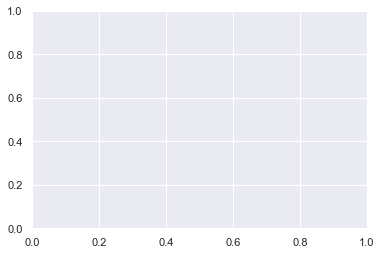

In [21]:
sns.set()
_ = plt.hist(violations_data["penalty"])
_ = plt.xlabel('Amount')
_ = plt.ylabel('Count of Penalties at that Amount')
plt.show()

In [26]:
# Copy the license violations zip codes into a separate var.

In [22]:
# Use a regular expression to pull out the zip codes.
violations_data["zip"]=violations_data["address"].str.extract(r"(\d+$)")
# This regex matches the characters (r) that are digits (\d) at the end ($). 
violations_data["zip"]

0      20910
1      20912
2      20912
3      20912
4      20902
       ...  
937    20902
938    20902
939    20906
940    20906
941    20906
Name: zip, Length: 942, dtype: object

In [23]:
violations_data["address"]

0       609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910
1      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
2      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
3      7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...
4      2407 PRICE AVENUE , SILVER SPRING , MARYLAND -...
                             ...                        
937               11423 GEORGIA AVE. , WHEATON, MD 20902
938               11423 GEORGIA AVE. , WHEATON, MD 20902
939    14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...
940         14101 GEORGIA AVE. , ASPEN HILL , MD - 20906
941    14101 GEORGIA AVE. , ASPEN HILL , MARYLAND - 2...
Name: address, Length: 942, dtype: object

In [29]:
# Now I have the zip codes of the Alcohol Beverage License Violations in the var "zip".
# Do frequency of violations by zip code.

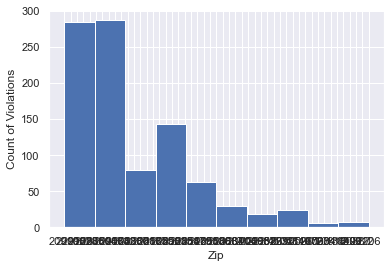

In [24]:
violations_data.sort_values(by=["zip", "facilityname"])

sns.set()
_ = plt.hist(violations_data["zip"])
_ = plt.xlabel('Zip')
_ = plt.ylabel('Count of Violations')
plt.show()

In [25]:
# This is too messy to see the zip codess. Try again.

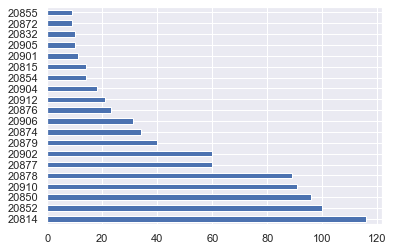

In [26]:
# This plots the top 20 most frequent zip codes. 
violations_data["zip"].value_counts()[:20].plot(kind="barh")


In [ ]:
# This has the potential to be interesting as I recognize some of the zip codes/areas. 
# I'll come back to this.

In [ ]:
# Investigate frequencies by types of violations. 
# Group the sale to minor and 6.1 sales or service to minors. 

In [27]:
#violations_minors[violations_data["violation"].isin(["SALE TO MINOR", "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS"])]
#violations_minors["violation"]

NameError: name 'violations_minors' is not defined

In [34]:
#violations_minors[(violations_data["violation"] == "SALE TO MINOR") or (violations_data["violation"] == "6.1 SALES OR SERVICE TO MINORS/CONSUMPTION OR POSSESSION OF MINORS")]
#violations_minors["violation"]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
violations_minors = violations_data["violation"].str.contains("minor")
type(violations_minors)

In [ ]:
print(violations_minors)

In [ ]:
violations_minors.describe(include="all")

In [29]:
# Once I get the violations involving minors into a data set...
# Get the frequency by zip code for violations involving minors. See how it compares to all violations.
# Does it follow the same frequency or do some zip codes have higher rates of violations by minors. 
# 

In [30]:
# I may try to overlay the high school locations with areas of highest crime and/or alcohol violations. 

In [64]:
# Import the public high schools data set.
schools_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/772q-4wm8.json").json())
schools_data.head()

,category,school_name,address,city,zip_code,phone,url,longitude,latitude,location,:@computed_region_vu5j_pcmz,:@computed_region_tx5f_5em3,:@computed_region_kbsp_ykn9,:@computed_region_d7bw_bq6x,:@computed_region_rbt8_3x7n
0,HIGH SCHOOLS,Walter Johnson HS,6400 Rock Spring Dr,Bethesda,20814,301-803-7100,http://www.montgomeryschoolsmd.org/schools/wjhs,-77.1301017226,39.0253918855,"{'latitude': '39.0253918855', 'longitude': '-7...",1,1,19,103,1
1,HIGH SCHOOLS,Bethesda-Chevy Chase HS,4301 East West Hwy,Bethesda,20814,240-497-6300,http://www.montgomeryschoolsmd.org/schools/bcchs,-77.0889699717,38.9868264765,"{'latitude': '38.9868264765', 'longitude': '-7...",1,1,12,111,1
2,ELEMENTARY SCHOOLS,Bethesda ES,7600 Arlington Rd,Bethesda,20814,301-657-4979,http://www.montgomeryschoolsmd.org/schools/bet...,-77.0998645245,38.9864595389,"{'latitude': '38.9864595389', 'longitude': '-7...",1,1,12,111,1
3,ELEMENTARY SCHOOLS,Garrett Park ES (at Grosvenor Center),5701 Grosvenor La,Bethesda,20814,301-929-2170,http://www.montgomeryschoolsmd.org/schools/gar...,-77.1141310594,39.0235338133,"{'latitude': '39.0235338133', 'longitude': '-7...",1,1,19,111,1
4,ELEMENTARY SCHOOLS,Somerset ES,5811 Warwick Pl,Chevy Chase,20815,301-657-4985,http://www.montgomeryschoolsmd.org/schools/som...,-77.092408162,38.9691922144,"{'latitude': '38.9691922144', 'longitude': '-7...",1,1,5,110,7


In [65]:
# Drop the unnecessary columns (i.e., category, elementary/middle schools, phone and url).

In [66]:
high_schools=schools_data[schools_data["category"] == "HIGH SCHOOLS"]
cols_drop=["category","phone","url"]
high_schools.drop(cols_drop, inplace=True, axis=1)
print(high_schools)

                 school_name                    address           city  \
0          Walter Johnson HS        6400 Rock Spring Dr       Bethesda   
1    Bethesda-Chevy Chase HS         4301 East West Hwy       Bethesda   
20           Walt Whitman HS          7100 Whittier Blv       Bethesda   
28            Poolesville HS           17501 Willard Rd    Poolesville   
37       Thomas S Wootton HS           2100 Wootton Pkw      Rockville   
40              Rockville HS          2100 Baltimore Rd      Rockville   
46     Richard Montgomery HS  250 Richard Montgomery Dr      Rockville   
60      Winston Churchill HS      11300 Gainsborough Rd        Potomac   
66     Col Zadok Magruder HS     5939 Muncaster Mill Rd      Rockville   
72               Sherwood HS  300 Olney Sandy Spring Rd   Sandy Spring   
75           Paint Branch HS     14121 Old Columbia Pik   Burtonsville   
76             Clarksburg HS              22500 Wims Rd     Clarksburg   
81               Damascus HS          

C:\Users\jenni\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:
# Map the high school locations.

In [68]:
# Import the plotly express package

import plotly.express as px

fig_schools = px.scatter_geo(high_schools, 
                     lon="longitude", 
                     lat="latitude",
                     # choose the map chart's projection
                     projection="albers usa",
                     center=dict(lon=-77.14, lat=39.098),
                     # columns which is in bold in the pop up
                     hover_name = "school_name",
                     # format of the popup not to display these columns' data
                     hover_data = {"longitude": False, "latitude": False})
fig_schools.show()



In [69]:
# I'm having trouble zooming in on this map. I decided to use a different map (below) that includes streets.

In [70]:
# Follow instructions from here: https://plotly.com/python/mapbox-layers/#openstreetmap-tiles-no-token-needed
high_schools['latitude']=high_schools['latitude'].astype(float)
high_schools['longitude']=high_schools['longitude'].astype(float)

fig_schools_map = px.scatter_mapbox(high_schools, lat="latitude", lon="longitude", hover_name="school_name", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_schools_map.update_layout(mapbox_style="open-street-map")
fig_schools_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_schools_map.show()


<ipython-input-70-afdd23549f67>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-70-afdd23549f67>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [71]:
# Note To Self: I don't know what to do about the warnings (above)
    # A value is trying to be set on a copy of a slice from a DataFrame.
    # Try using .loc[row_indexer,col_indexer] = value instead

In [72]:
# Note To Self: While this map is OK, I can't decide what would make it better. 
# I was not able to make the points/circles bigger.
# I tried zooming in closer but then not all of the high schools show up.
# I tried to get the city to display as well as the HS name but was not able to get this to work.

In [73]:
# Note To Self: I was able to clean the violation addresses in excel, upload to geocodio, then use that csv to map. 
# However, I want to be able to do this directly from the dataMontgomery API. 

# I tried again for the geolocation using geopy (below) following these instructions from towardsdatascience.com.
#  https://towardsdatascience.com/pythons-geocoding-convert-a-list-of-addresses-into-a-map-f522ef513fd6
# I think there is a limit to how many times I can use the geolocater/site though. Not sure about that. 

In [74]:
# Import the violations data set (I don't need to do this repeatedly but sometimes I am picking up here when I start again)
violations_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/4tja-rkhg.json").json())
violations_data.head()

,facilityname,address,violationdate,violation,disposition,dispositiondate
0,EL CARACOL CAFE,"609 SLIGO AVE , SILVER SPRING , MARYLAND - 20910",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,NaN
1,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,5.5 RECORDS,$500 +ALERT,NaN
2,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,6.9 STORAGE,$1600 +ALERT,NaN
3,MOGOTILLO RESTAURANT,"7637 NEW HAMPSHIRE AVE , TAKOMA PARK , MARYLAN...",2020-09-19T00:00:00.000,5.7 DISPLAY OF LICENSE,$100 +ALERT,NaN
4,GISELE'S CREOLE CUISINE,"2407 PRICE AVENUE , SILVER SPRING , MARYLAND -...",2020-09-18T00:00:00.000,6.9 STORAGE,$400 +ALERT,NaN


In [75]:
# I had to pip install geopy on the cmd line to get this to work.
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="sample app")
# Apply geolocator.geocode to the address column
violations_data["location"]=violations_data["address"].apply(geolocator.geocode)

In [76]:
violations_data["point"]=violations_data["location"].apply(lambda loc: tuple(loc.point) if loc else None)

In [77]:
# Then pull the values into 3 diff vars (the 3rd one is altitude)

In [78]:
violations_data[["latitude", "longitude", "altitude"]] = pd.DataFrame(violations_data["point"].to_list(), index=violations_data.index)

In [79]:
# Map the locations of the violations
fig_violations_map = px.scatter_mapbox(violations_data, lat="latitude", lon="longitude", hover_name="facilityname", zoom=9, 
                         hover_data={"latitude":False, "longitude":False})
fig_violations_map.update_layout(mapbox_style="open-street-map")
fig_violations_map.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_violations_map.show()


In [ ]:
# I might need to map the using Tableau - it might be easier.

In [3]:
# Pull in the Crash Incidents data 
# Trying to narrow down by alcohol activity because the dataset is so big.
selections = {"Driver Substance Abuse": "ALCOHOL PRESENT"}

crash_incidents_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/bhju-22kf.json",params=selections).json())
crash_incidents_data.head()

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,...,road_alignment,road_condition,road_division,latitude,longitude,geolocation,off_road_description,lane_type,related_non_motorist,non_motorist_substance_abuse
0,MCP3138002L,200039964,Montgomery County Police,Property Damage Crash,2020-10-10T18:26:00.000,No,County,2.8,East,North,...,CURVE RIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.1814558,-77.061693,"{'latitude': '39.1814558', 'longitude': '-77.0...",NaN,NaN,NaN,NaN
1,MCP2001001C,200031165,Montgomery County Police,Fatal Crash,2020-08-11T00:15:00.000,No,Maryland (State),10.4,North,North,...,CURVE RIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.11482236,-76.99265161,"{'latitude': '39.11482236', 'longitude': '-76....",NaN,NaN,NaN,NaN
2,EJ7881000P,200038048,Gaithersburg Police Depar,Injury Crash,2020-09-27T21:35:00.000,No,County,2.83,North,East,...,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.1093976,-77.1884339,"{'latitude': '39.1093976', 'longitude': '-77.1...",NaN,NaN,NaN,NaN
3,MCP3253000M,200040096,Montgomery County Police,Property Damage Crash,2020-10-11T22:20:00.000,Yes,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,39.14179968,-77.19504908,"{'latitude': '39.14179968', 'longitude': '-77....",PARKING LOT OF CANCUN MEXICAN CUISINE AT 117 E...,NaN,NaN,NaN
4,MCP3097001S,200039010,Montgomery County Police,Property Damage Crash,2020-10-04T02:28:00.000,No,County,3.17,North,North,...,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.096055,-76.94581167,"{'latitude': '39.096055', 'longitude': '-76.94...",NaN,NaN,NaN,NaN


In [4]:
crash_incidents_data.shape

(1000, 44)

In [5]:
crash_incidents_data.describe(include="all")

,report_number,local_case_number,agency_name,acrs_report_type,crash_date_time,hit_run,route_type,mile_point,mile_point_direction,lane_direction,...,road_alignment,road_condition,road_division,latitude,longitude,geolocation,off_road_description,lane_type,related_non_motorist,non_motorist_substance_abuse
count,1000,1000,1000,1000,1000,1000,842,850,842,850,...,850,850,850,1000,1000,1000,150,185,12,12
unique,1000,1000,9,3,999,2,8,392,4,5,...,6,6,8,998,1000,1000,149,14,4,3
top,MCP2995002V,200032886,Montgomery County Police,Property Damage Crash,2015-04-25T00:08:00.000,No,County,0,North,North,...,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.05905,-77.20079833,"{'latitude': '39.15215167', 'longitude': '-77....",PARKING LOT,OFF ROAD,PEDESTRIAN,NONE DETECTED
freq,1,1,771,806,2,723,486,102,321,218,...,604,824,482,2,1,1,2,47,7,7


In [9]:
# Pull in the Crimes data 
# Trying to narrow by crimes against society and then crime2 for alcohol violations. 
# looking at the crimes data, there are only 8 alcohol-related crimes in the crimes data set.
# under Crime Name 2  Drunkenness,  Driving Under the Influence,  Liquor Law Violations
select_crime = {"crimename1": "Crime Against Society"}

crimes_data = pd.DataFrame(requests.get("https://data.montgomerycountymd.gov/resource/icn6-v9z3.json",params=select_crime).json())
crimes_data.head()

,incident_id,offence_code,case_number,date,nibrs_code,victims,crimename1,crimename2,crimename3,district,...,start_date,latitude,longitude,police_district_number,geolocation,location,address_number,end_date,street_prefix_dir,street_suffix_dir
0,201303680,5404,200037909,2020-09-26T20:09:15.000,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,MONTGOMERY VILLAGE,...,2020-09-26T20:09:00.000,39.12677385,-77.173515894,6D,"{'latitude': '39.1268', 'longitude': '-77.1735...",NaN,NaN,NaN,NaN,NaN
1,201303670,5311,200037939,2020-09-26T23:25:22.000,90C,1,Crime Against Society,Disorderly Conduct,PUBLIC PEACE - DISORDERLY CONDUCT,GERMANTOWN,...,2020-09-27T23:55:00.000,39.225051606,-77.236816301,5D,"{'latitude': '39.2251', 'longitude': '-77.2368...",NaN,NaN,NaN,NaN,NaN
2,201303627,5016,200037978,2020-09-27T10:44:38.000,90Z,1,Crime Against Society,All Other Offenses,OBSTRUCT GOVT - VIOLATION OF A COURT ORDER,MONTGOMERY VILLAGE,...,2020-09-27T10:00:00.000,39.109624905,-77.204225038,6D,"{'latitude': '39.1096', 'longitude': '-77.2042...",9800 BLK GABLE RIDGE TER,9800,NaN,NaN,NaN
3,201303627,3562,200037978,2020-09-27T10:44:38.000,35A,1,Crime Against Society,Drug/Narcotic Violations,DRUGS - MARIJUANA - POSSESS,MONTGOMERY VILLAGE,...,2020-09-27T10:00:00.000,39.109624905,-77.204225038,6D,"{'latitude': '39.1096', 'longitude': '-77.2042...",9800 BLK GABLE RIDGE TER,9800,NaN,NaN,NaN
4,201303600,5404,200037945,2020-09-27T01:07:13.000,90D,1,Crime Against Society,Driving Under the Influence,DRIVING UNDER THE INFLUENCE LIQUOR,BETHESDA,...,2020-09-27T01:07:00.000,38.998781435,-77.069622185,2D,"{'latitude': '38.9988', 'longitude': '-77.0696...",8800 BLK BRIERLY RD,8800,NaN,NaN,NaN


In [10]:
crimes_data.shape

(1000, 30)

In [ ]:
# Pull population data from this site https://worldpopulationreview.com/zips/maryland
# This is the csv link:  blob:https://worldpopulationreview.com/00124d35-9d90-48ad-973f-a3eaddcbe13e 
# this is the json link:  blob:https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b
# I downloaded MD counties with populations by zip code so I can select Montgomery County. 
# The site says it reflects 2020 population data.


In [39]:
all_zip_codes_data = pd.DataFrame(requests.get("https://worldpopulationreview.com/eaa13b61-5379-49d2-a077-3d611a223c7b").json())
all_zip_codes_data.head()

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [37]:
pop_zip_codes = pd.read_csv('PopulationZip.csv')
pop_zip_codes.head()


FileNotFoundError: [Errno 2] File PopulationZip.csv does not exist: 'PopulationZip.csv'

In [66]:
pop_zip_codes.shape

(45, 4)

In [ ]:
# Get frequency of all crimes by zip code. (crimes data set has zip code column) 
# Need to calculate violations per population by zip code and crimes per population by zip code. 
# Compare alcohol violations by zip code with crimes by zip code. 

In [ ]:
# zip codes with high crime rates and zip codes with high ABS licenses and/or violations = correlation? 
# not just look at major crimes but also petty crimes. 

# Do this by taking ABS licenses (or violations) by population by zip code? 
# Then crimes by population by zip code? 